In [19]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras import optimizers

In [76]:
# dimensions of our images.
img_width, img_height = 200, 200

train_data_dir = 'images/train'
validation_data_dir = 'images/validation'
nb_train_samples = 90 
nb_validation_samples = 10
epochs = 10
batch_size = 10

In [77]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [78]:
model = Sequential()
model.add(Conv2D(20, (5, 5), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #,strides=(2, 2)
model.add(Dropout(0.2))

model.add(Conv2D(30, (5, 5), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #,strides=(2, 2)
model.add(Dropout(0.2))

model.add(Conv2D(50, (5, 5), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #,strides=(2, 2)
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# model.add(Conv2D(32, (3, 3), input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))



model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 200, 200, 20)      1520      
_________________________________________________________________
activation_56 (Activation)   (None, 200, 200, 20)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 100, 100, 20)      0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 100, 100, 20)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 100, 100, 30)      15030     
_________________________________________________________________
activation_57 (Activation)   (None, 100, 100, 30)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 50, 50, 30)        0         
__________

In [80]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [81]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary')

Found 90 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [35]:
train_generator.class_indices

{'0': 0, '1': 1}

In [85]:
# early stopping
earlystop = EarlyStopping(monitor='val_acc', baseline=1.0)

In [82]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)
    #callbacks = [earlystop])


Epoch 1/10
9/9 [==============================] - 10s 1s/step - loss: 1.2009 - acc: 0.5778 - val_loss: 0.6225 - val_acc: 0.6000
Epoch 2/10
9/9 [==============================] - 8s 850ms/step - loss: 0.5239 - acc: 0.8333 - val_loss: 0.2938 - val_acc: 1.0000
Epoch 3/10
9/9 [==============================] - 8s 837ms/step - loss: 0.5216 - acc: 0.9111 - val_loss: 0.1639 - val_acc: 1.0000
Epoch 4/10
9/9 [==============================] - 8s 837ms/step - loss: 0.0991 - acc: 0.9889 - val_loss: 0.0102 - val_acc: 1.0000
Epoch 5/10
9/9 [==============================] - 7s 829ms/step - loss: 0.0165 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 1.0000
Epoch 6/10
9/9 [==============================] - 8s 849ms/step - loss: 0.0143 - acc: 1.0000 - val_loss: 5.1355e-04 - val_acc: 1.0000
Epoch 7/10
9/9 [==============================] - 7s 824ms/step - loss: 0.0165 - acc: 0.9889 - val_loss: 4.8121e-04 - val_acc: 1.0000
Epoch 8/10
9/9 [==============================] - 7s 827ms/step - loss: 0.0063 - acc

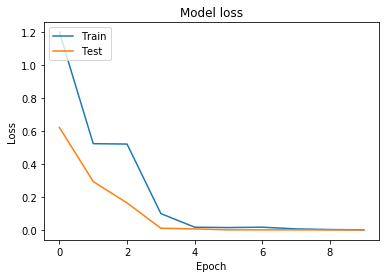

In [83]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()